In [339]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd


import keras
import tensorflow as tf

## Regressão Linear

### Regressão Linear Simples

In [340]:
# Your dataset
altura      = np.array([1.087, 1.613, 0.953, 1.003, 1.156, 0.978, 1.092, 0.572, 0.940, 0.597, 0.838, 1.473])
comprimento = np.array([37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47])

Problema: Dado uma altura n ̃ao presente na tabela, qual
dever ́a ser o comprimento do cateter?

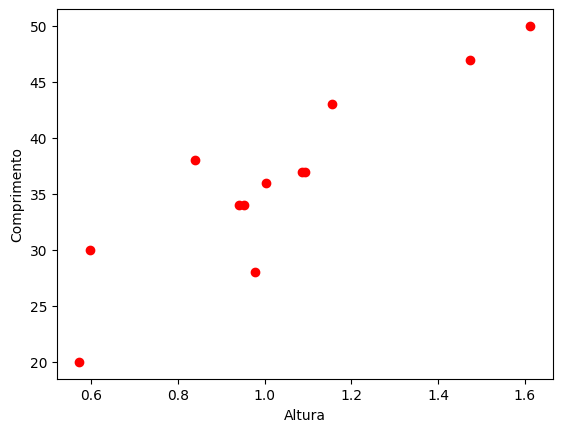

In [341]:
plt.plot(altura, comprimento, 'ro')
plt.xlabel('Altura')
plt.ylabel('Comprimento')
plt.show()

• A coluna Altura é a entrada do nosso modelo.

• A coluna Comprimento é a sa ́ıda do nosso modelo.

• Nosso conjunto de dados é formado por 12 alturas e 12
comprimentos correspondentes.

• Matematicamente, temos:
$D = \{(x1,y1),··· ,(x2,y2)\}= \{(xi ,yi )\}_{12i}=1$,
em que $x_i$  ́e a i - ́esima entrada e yi  ́e a i - ́esima sa ́ıda.

• Objetivo: Encontrar uma relação entre xi e yi que forne ̧ca uma
predicao $\bar yi$ o mais proximo poss ́ıvel da saida real y

#### Terminologia

* **Features :** Variavel explicativa
* **Target  :** Variavel resposta
* **Modelo  :**
* **Função Objetivo:** Indica o quão mal (ou o
quão bem) um modelo aproxima os dados disponíveis.


#### Modelo
$y_i =  w_0 + w_1 x_i$

Quero minimizar error do valor real e valor predito

$$ J = \min_{w_0, w_1} \frac{1}{2N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))^2$$

> Para minimizar o error quadrático médio do valor predito e real será feito o metodo da descida o gradiente, para tal derivamos em relação a $w_0$ e $w_1$

`W_0`

$\large \frac{\partial J}{\partial w_0}$

$\frac{\partial J}{\partial w_0} = \frac{\partial}{\partial w_0}\frac{1}{2N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))^2$

$\frac{\partial J}{\partial w_0} =  2\frac{1}{2N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))(-1)$
* Corta o 2

$\frac{\partial J}{\partial w_0} =  \frac{1}{N} \sum^N_{i=1}(y_i - (w_0 + w_1 x_i))(-1)$


$\frac{\partial J}{\partial w_0} =  \frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(-1)$


$\frac{\partial J}{\partial w_0} =  -1\cdot\frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1x_i)$

$E_{w_0} = \frac{\partial J}{\partial w_0}$

`W_1`

$\large \frac{\partial J}{\partial w_1}$

$\frac{\partial J}{\partial w_1} = \frac{\partial}{\partial w_0}\frac{1}{2N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)^2$

$\frac{\partial J}{\partial w_1} =  2\frac{1}{2N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(-w_1)$
* Corta o 2

$\frac{\partial J}{\partial w_1} =  \frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(-1*w_1)$

$\frac{\partial J}{\partial w_1} =  -\frac{1}{N} \sum^N_{i=1}(y_i - w_0 - w_1 x_i)(x_i)$

$E_{w1} = \frac{\partial J}{\partial w_1}$

#### Gradiente descente

```pseudo
alpha <- define (0.01 geralmente)
w_0   <- inicia aleatoriamente
w_0   <- inicia aleatoriamente
loss  <- loss_fn(ytrue, ypred) 

PARA I EM 1 ATÉ MAX_ITER:
    w_0 <- w_0 + alpha * E_w0 
    w_1 <- w_1 + alpha * E_w1

    loss <- loss_fn(ytrue, ypred) 
```

In [342]:
class ModeloSimples(tf.Module):
    def __init__(self, name='Modelo'):
        super().__init__(name)
        self.intercept = tf.Variable(1, dtype=tf.float32)
        self.coef_     = tf.Variable( abs(np.random.normal()), dtype=tf.float32)
    
    def call(self, inputs):
        return self.intercept + self.coef_ * inputs

In [343]:
def GD(inputs, targets, model ,learning_rate=0.01, max_epochs=100, verbose=False):

    x = inputs  # Valores de entrada
    y = targets # Valores reais

    # Definindo a função de perda
    loss = tf.keras.losses.MeanSquaredError()
    listLoss = []
    for i in range(1, max_epochs + 1):
        # Atualizando o coeficiente : w = w - lr * np.mean((y - w * x) * x)
        derW1 = 1 * learning_rate * np.mean((y - model.call(x)) * x)
        model.coef_ = model.coef_ + tf.Variable(derW1, dtype=tf.float32) 
            

        # Atualizando o intercept : w = w - lr * np.mean(y - w * x) 
        derW0 = 1 * learning_rate * np.mean(y - model.call(x))
        model.intercept = model.intercept + tf.Variable(derW0, dtype=tf.float32) 
            
        loss_ = loss(y, model.call(x))
        if verbose:
            if i % 10 == 0:
                print(f'Epoch {i} - Loss: {loss_}')
        listLoss.append(loss_)

    return model, listLoss

In [344]:
model = ModeloSimples()

In [345]:
modelGB, listLoss = GD(
    altura, comprimento, model, 
    verbose   =True, 
    max_epochs=100
    )

Epoch 10 - Loss: 818.5082397460938
Epoch 20 - Loss: 542.3129272460938
Epoch 30 - Loss: 361.0565185546875
Epoch 40 - Loss: 242.1020965576172
Epoch 50 - Loss: 164.0320587158203
Epoch 60 - Loss: 112.7918472290039
Epoch 70 - Loss: 79.15835571289062
Epoch 80 - Loss: 57.079097747802734
Epoch 90 - Loss: 42.58230972290039
Epoch 100 - Loss: 33.06160354614258


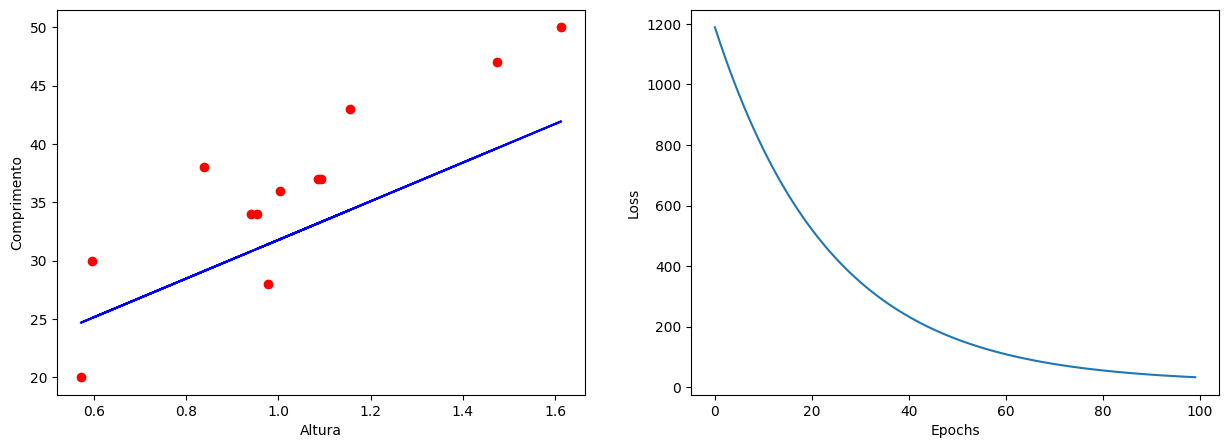

In [346]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(altura, comprimento, 'ro')
plt.plot(altura, modelGB.call(altura), 'b')
plt.xlabel('Altura')
plt.ylabel('Comprimento')

plt.subplot(1,2,2)
plt.plot(listLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


```pseudo
Gradiente descendente Estocatico

alpha <- define (0.01 geralmente)
w_0   <- inicia aleatoriamente
w_0   <- inicia aleatoriamente
loss  <- loss_fn(ytrue, ypred) 

PARA I EM 1 ATÉ MAX_EPOCAS:
    XI <- X(PERMUTAÇÃO)
    YI <- Y(PERMUTAÇÃO)
    PARA J EM 1 ATÉ N_INSTANCIA:
        w_0 <- w_0 + alpha * Ei_w0
        w_1 <- w_1 + alpha * Ei_w1(xi)

    loss <- loss_fn(ytrue, ypred) 

```

In [347]:
def SGD(inputs, targets, model ,learning_rate=0.01, max_epochs=100, verbose=False):

    x = inputs.reshape(-1, 1)  # Valores de entrada
    y = targets.reshape(-1, 1) # Valores reais

    # Definindo a função de perda
    loss = tf.keras.losses.MeanSquaredError()
    
    # N
    N = np.size(y, 0)
   

    for i in range(1, max_epochs + 1):
        xPer = tf.random.shuffle(x)
        yPer = tf.random.shuffle(y)

        for i in range(N):
            derW1 = 1 * learning_rate * ((yPer[i, :].numpy()[0] - model.call(xPer[i, :].numpy()[0])) * xPer[i, :].numpy()[0])
           
            model.coef_ = model.coef_ + tf.Variable(derW1, dtype=tf.float32)  
            

            derW0 = 1 * learning_rate * (yPer[i, :].numpy()[0] - model.call(xPer[i, :].numpy()[0]))
            model.intercept = model.intercept + tf.Variable(derW0, dtype=tf.float32) 
            
        
    return model

In [348]:
model = ModeloSimples()
modelSGB = SGD(altura, comprimento, model, verbose=True, max_epochs=100)

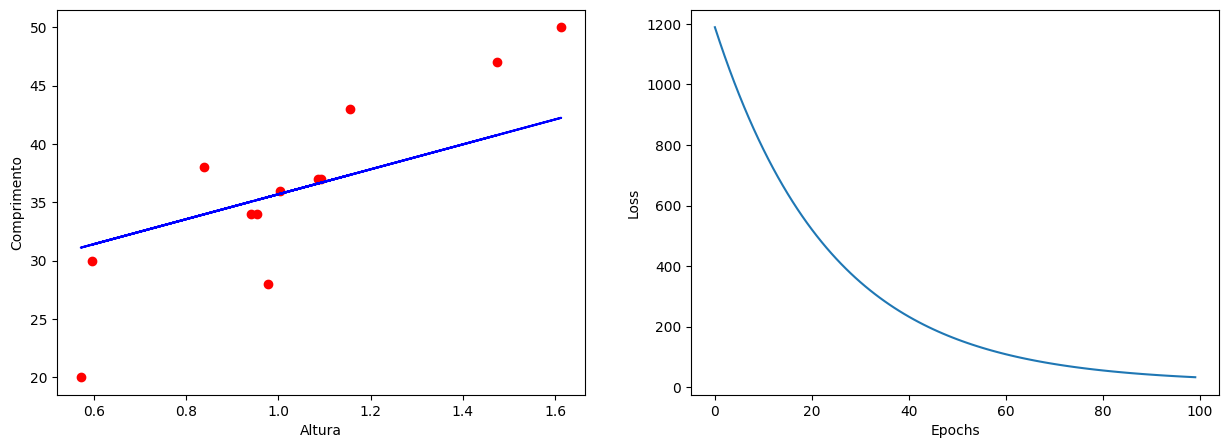

In [349]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(altura, comprimento, 'ro')
plt.plot(altura, modelSGB.call(altura), 'b')
plt.xlabel('Altura')
plt.ylabel('Comprimento')

plt.subplot(1,2,2)    
plt.plot(listLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

&nbsp;

### Meus Modelos Padrões

In [350]:
from sklearn.metrics import r2_score, mean_squared_error

In [351]:
class Modelo(tf.Module):
    def __init__(self, name='Modelo', shape=(1,1)):
        super().__init__(name)
        
        # Definindo o interceptor
        self.intercept = tf.Variable(
            initial_value = 1, 
            dtype = tf.float32,
            name  ='Interceptor'
        )

        # Definindo o coeficiente
        self.coef_ = tf.Variable( 
            initial_value = abs(np.random.randn(*shape)), 
            dtype = tf.float32,
            name  = 'Coeficiente')
    
    def call(self, inputs): 
        # Tratando o input de acordo com a sua dimensão
        inputs = inputs.reshape(-1, 1) if len(inputs.shape) == 1 else inputs

        return tf.multiply(inputs, self.coef_) + self.intercept

In [352]:
def SGD(X, y, model, learning_rate=0.01, max_epochs=100, verbose=False):
    # Definindo o otimizador
    optim = keras.optimizers.SGD(learning_rate=learning_rate)

    # Definindo a função de perda
    loss  = tf.keras.losses.MeanSquaredError()
    
    
    for i in range(1, max_epochs + 1):
        with tf.GradientTape() as tape:
            ypred = model.call(X)
            loss_  = loss(y, ypred)

        gradient = tape.gradient(loss_, model.trainable_variables)
        optim.apply_gradients(zip(gradient, model.trainable_variables))
        if verbose:
            if i % 10 == 0:
                print(f'Epoch {i} - Loss: {loss_}')
    
    return model

In [353]:
altura.shape

(12,)

In [354]:
model = Modelo(shape=(12, 1))

In [355]:
modelSGB = SGD(altura, comprimento, model, max_epochs=1000)

In [356]:
pred = modelSGB.call(altura).numpy()

In [357]:
print(f'Coeficiente: {modelSGB.coef_}\nIntercept: {modelSGB.intercept}\nR2: {r2_score(comprimento, pred)}\nMSE: {mean_squared_error(comprimento, pred)}')

Coeficiente: <tf.Variable 'Coeficiente:0' shape=(12, 1) dtype=float32, numpy=
array([[ 5.177533 ],
       [11.756197 ],
       [ 2.9223034],
       [ 4.48945  ],
       [ 9.742179 ],
       [-2.0108068],
       [ 5.127274 ],
       [-7.0689335],
       [ 2.9508255],
       [ 0.3718925],
       [ 6.359082 ],
       [10.724642 ]], dtype=float32)>
Intercept: <tf.Variable 'Interceptor:0' shape=() dtype=float32, numpy=30.638044357299805>
R2: 0.9279040694236755
MSE: 4.4198802630532255


`Modelo customizado`

In [ ]:
def SGD(X, y, model, optim = keras.optimizers.SGD(learning_rate=0.01), loss = tf.keras.losses.MeanSquaredError(), max_epochs=100, verbose=False):   

    X = X.reshape(-1, 1) if len(X.shape) == 1 else X
    
    for i in range(1, max_epochs + 1):
        with tf.GradientTape() as tape:
            ypred = model.call(X)
            loss_  = loss(y, ypred)

        gradient = tape.gradient(loss_, model.trainable_variables)
        optim.apply_gradients(zip(gradient, model.trainable_variables))
        if verbose:
            if i % 10 == 0:
                print(f'Epoch {i} - Loss: {loss_}')
    
    return model